### Required Packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
random.seed(0)

### Define Data

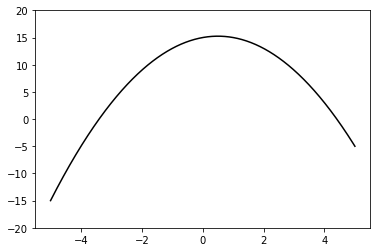

In [2]:
# Our Original Polynomial is -(x^2) + (x) + 15
coefs = [15, 1, -1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]* x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [3]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

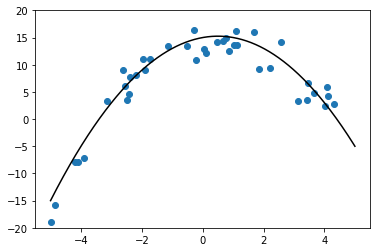

In [4]:
plt.scatter(X, Y)
draw_polynomial(coefs)

In [5]:
# Our Original Polynomial is x3 -(x^2) + (x) + 15
coefs = [15, 1, -1, 1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-10,40)
    plt.plot(x, sum([coefs[i]* x**i for i in range(n)]), linestyle='-', color='black')

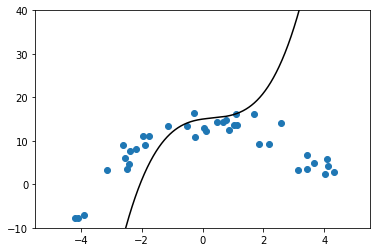

In [6]:
plt.scatter(X, Y)
draw_polynomial(coefs)

### Polynomial Data Preparation

In [7]:
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

### Splitting data into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [9]:
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

### Train Data

Training error (rmse): 6.39754704067902
Testing error (rmse): 4.54433541876368


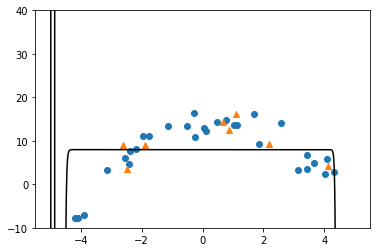

Polynomial coefficients
[7.9715314145401965, 8.863568813133087e-132, 1.1129612856385608e-136, 1.0852556333075153e-136, -1.9291752371889131e-140, 3.183831061279402e-139, 1.0250665447337477e-143, -3.843999542751554e-144, -1.8645851828000517e-155, 4.804999428439442e-145, 1.921999771375777e-144, -3.843999542751554e-144, -2.3571702163461042e-152, 4.80499530931832e-145, -1.9352875316616155e-146, -6.804124955668289e-147, 4.226920888492913e-143, 2.505974030598918e-142, -6.046090796296374e-143, -3.1995983555756386e-144, -1.713732797451554e-150, -2.4770893032766636e-150, -5.328002722852289e-150, -7.350558211298523e-150, -1.4772196216123017e-149, -1.6556194622365923e-149, -4.189227489937922e-149, -4.715732303312716e-149, -1.2001606154383151e-148, -1.0269072468465306e-148, -3.94574376429659e-148, -2.041253593583397e-148, -1.414841882380502e-147, 1.2660867376612198e-149, -4.456987023834069e-147, -7.620514792434764e-148, -1.2916198739841764e-146, 5.835130031296208e-147, -2.5076107427767777e-146, 2.6

-0.18694940702815832

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=False).fit(X_train, y_train)
display_results(lr)
lr.score(X_test, y_test)

Training error (rmse): 0.07817277148135736
Testing error (rmse): 7179119.333123302


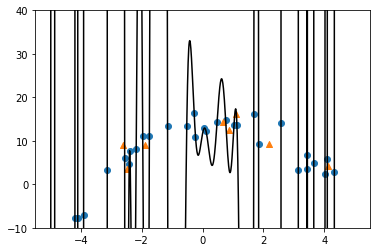

Polynomial coefficients
[11.709507488758947, 35.92251220102162, -202.19360490189646, -1107.446324468121, 3463.010994520411, 5415.835362706175, -15271.12691751704, -7711.325459441864, 25127.995924832652, 5195.3808137877595, -20767.452167137635, -2169.327228480746, 9822.306788295255, 662.1526502208477, -2811.756598537852, -147.85382958461375, 492.61512331045327, 21.21133030300248, -50.901168751559695, -1.6224248242138486, 2.6668886499448248, 0.03810974708291776, -0.023730639363459205, 0.001758135317556009, -0.0030013042860205447, -3.909623120931281e-05, 1.1790307410993996e-06, -2.317372961989071e-06, 3.7703021792960254e-06, -7.375586455560818e-08, 1.1634730666783462e-07, 1.5122249402628044e-09, -1.73621645824787e-11, 8.632460124034449e-11, -1.4441648550228347e-10, 6.000981021074979e-13, -7.610011982538846e-12, 8.740958867586929e-14, -2.368206307316043e-13, 5.4628351827144005e-15, -3.128565682642315e-15, 4.274726698645249e-16, 1.0680189584754894e-16, 1.0041843130976393e-17, 1.202729134946

-2962332436208.6685

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True).fit(X_train, y_train)
display_results(lr)
lr.score(X_test, y_test)

### Polynomial With Regularization

Training error (rmse): 2.0489184108940757
Testing error (rmse): 2.1198167249269892


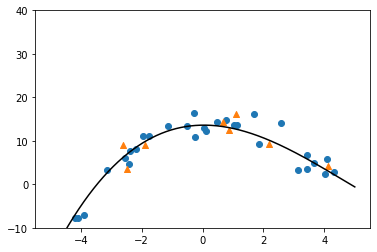

Polynomial coefficients
[13.603214344318465, 0.07885934659126094, -0.8947236399284012, 0.06109053687198902, -0.0, 4.4618590903414184e-05, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0

In [21]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1, normalize=True).fit(X_train, y_train)

display_results(lasso)

Training error (rmse): 2.0370844000490393
Testing error (rmse): 2.1860180041561925


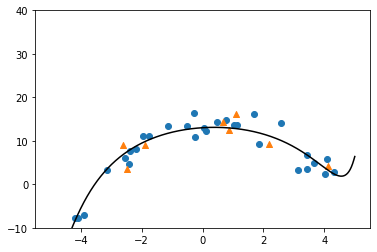

Polynomial coefficients
[13.016580623285979, 0.4335388485403477, -0.5678718504925087, 0.01702357140926799, -0.013793374622896261, 0.0007830020881040649, -0.00027027163772044176, 3.2174867119052235e-05, -3.871830514012932e-06, 1.1147178882431372e-06, -6.209495354378507e-09, 3.353315316522049e-08, 2.6131935809920513e-09, 8.909761869192017e-10, 1.528255398303834e-10, 2.0368061302354006e-11, 6.71386632392307e-12, 3.4360301230159065e-13, 2.6726541461689873e-13, 4.030176206238234e-18, 1.0195428057980292e-14, -3.8504609359623003e-16, 3.815317828062228e-16, -2.582990213042492e-17, 1.416503849528323e-17, -1.3043214882560272e-18, 5.247418294591358e-19, -5.881727638668261e-20, 1.945094526118491e-20, -2.4989665179680537e-21, 7.223335646347899e-22, -1.0243569031524411e-22, 2.688334789391501e-23, -4.1018406079168505e-24, 1.0025603145826879e-24, -1.6161197968886567e-25, 3.7449312791462353e-26, -6.293179465403635e-27, 1.4004311742662962e-27, -2.42893246149039e-28, 5.2400103739039e-29, -9.3096958560175

In [22]:
ridge = Ridge(alpha=0.1,normalize=True).fit(X_train, y_train)
display_results(ridge)


In [23]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = lr.predict(X_test)
predictions['L1 reg'] = lasso.predict(X_test)
predictions['L2 reg'] = ridge.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,2.197047,9.366124,-3.283547e+04,10.107788,11.104224
1,-2.613841,9.085322,1.386607e+03,6.187780,6.831130
2,0.675107,14.272553,2.269012e+01,13.267468,13.052906
3,1.108870,16.141450,1.630837e+01,12.673883,12.802295
4,-1.898524,8.956020,-6.254023e+01,9.809416,9.815091
5,-2.494937,3.506159,-1.305274e+02,6.884007,7.430268
6,4.130111,4.299534,2.030559e+07,3.024372,3.203750
7,0.876171,12.574041,3.159602e+00,13.026565,12.964109


In [25]:
print("{:.3f}%".format(ridge.score(X_test, y_test)*100))

72.534%


In [26]:
print("{:.3f}%".format(lasso.score(X_test, y_test)*100))

74.172%
